In [436]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor, KDTree, BallTree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [438]:
def data_extraction(data_path):
    data = pd.read_csv(data_path)
    data.drop(columns=['Name'], inplace=True)
    feature = data.keys()[:-1]
    X = data.to_numpy(dtype='float64')
    y = X[:, -1]
    X = X[:, :-1]
    return X, y

def result(truth, prediction):
    threshold = 0.1
    error = prediction - truth
    MSE = np.sum(np.power(error, 2)) / error.shape[0]
    print(f'Accuracy under the threshold {threshold}: {len(truth[abs(truth - prediction) <= threshold]) / len(truth) * 100}')
    print(f'MSE: {MSE}')
    compare = [truth, prediction]
    compare = np.array(compare)
    compare = compare.transpose()
    compare.sort(axis=0)
    x = list(range(len(compare)))
    Tplot = plt.scatter(x, compare[:, 0], s=2)
    Pplot = plt.scatter(x, compare[:, 1], s=2)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred', 'y_truth'])
    plt.show()

In [439]:
train_data_path = './dataset/train.csv'
test_data_path = './dataset/test.csv'
filter_data_path = './dataset/filter_train_data.csv'
X_train, y_train = data_extraction(train_data_path)
X_test, y_test = data_extraction(test_data_path)
X_filter, y_filter = data_extraction(filter_data_path)


## Linear Regression

In [440]:
def linear_regression(X_train, y_train, X_test, y_test):
    LR = LinearRegression()
    threshold = 0.1
    LR.fit(X_train, y_train)
    prediction = LR.predict(X_test)
    print(f'Score: {LR.score(X_test, y_test) * 100}')
    result(y_test, prediction)


Score: 56.324254327592996
Accuracy under the threshold 0.1: 43.04635761589404
MSE: 0.04099663202720404


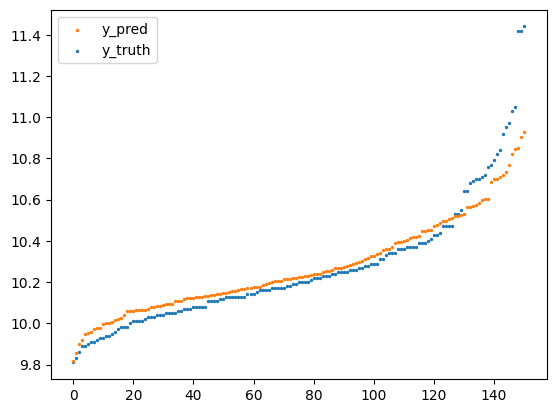

Score: 60.55846000500529
Accuracy under the threshold 0.1: 46.35761589403973
MSE: 0.03702215673406583


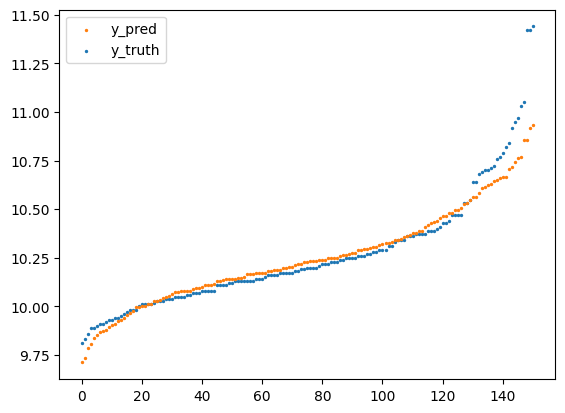

In [441]:
linear_regression(X_train, y_train, X_test, y_test)
linear_regression(X_filter, y_filter, X_test, y_test)


## Neural Network

In [445]:
def deep_learning(X_train, y_train, X_test, y_test, batch_size=10, lr=1e-5, hidden_layer=20):
    MLP = MLPRegressor(random_state=10, hidden_layer_sizes=hidden_layer, alpha=1e-2, batch_size=batch_size, verbose=False, learning_rate='adaptive', learning_rate_init=lr, max_iter=5000)
    threshold = 0.1
    MLP.fit(X_train, y_train)
    prediction = MLP.predict(X_test)
    print(f'Score: {MLP.score(X_test, y_test) * 100}')
    result(y_test, prediction)

Score: -68.34690848487116
Accuracy under the threshold 0.1: 9.933774834437086
MSE: 0.1580203418125477


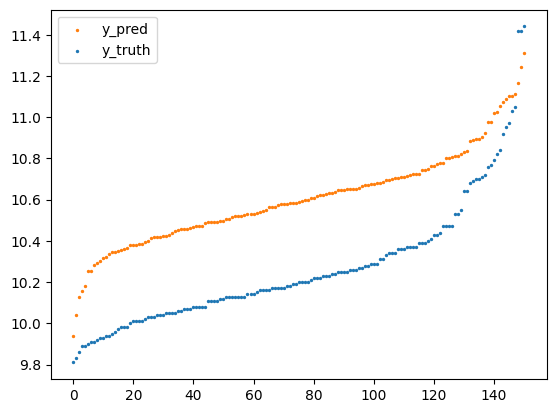

Score: -120.51177875113943
Accuracy under the threshold 0.1: 6.622516556291391
MSE: 0.20698536709439716


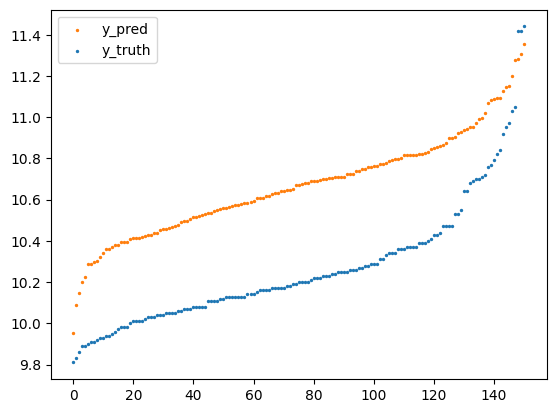

In [447]:
deep_learning(X_train, y_train, X_test, y_test, hidden_layer=500, batch_size=50, lr=5e-6)
deep_learning(X_filter, y_filter, X_test, y_test, hidden_layer=500,batch_size=20, lr=3e-6)


## SVM

In [448]:
def svm(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='poly', degree=20, C=8.5)
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_test)
    print(f'Score: {svr.score(X_test, y_test) * 100}')
    result(y_test, prediction)
    


Score: 53.13513612406023
Accuracy under the threshold 0.1: 38.41059602649007
MSE: 0.04399012655073521


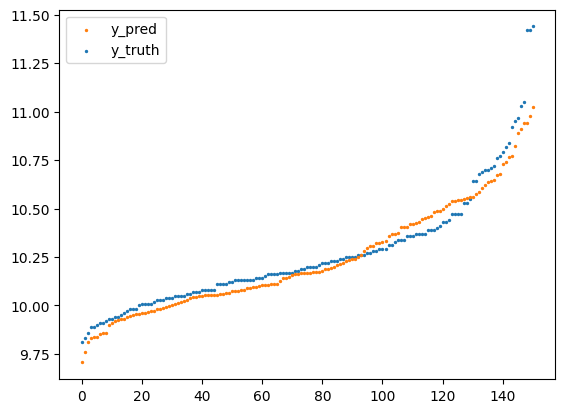

Score: 50.73113067335906
Accuracy under the threshold 0.1: 34.437086092715234
MSE: 0.04624666791795115


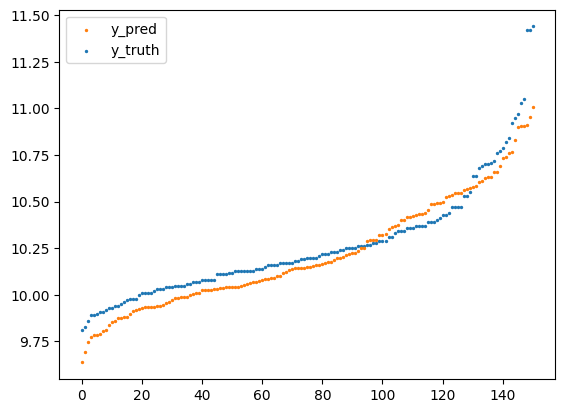

In [449]:
svm(X_train, y_train, X_test, y_test)
svm(X_filter, y_filter, X_test, y_test)


## Nearest Neighbor Regression

In [432]:
def kd(X_train, y_train, X_test, y_test):
    tree = KDTree(X_train)
    neighbor = list(int(ele[0]) for ele in tree.query(X_test, return_distance=False))
    prediction = y_train[neighbor]
    result(y_test, prediction)

Accuracy under the threshold 0.1: 93.37748344370861
MSE: 0.00403576158940397


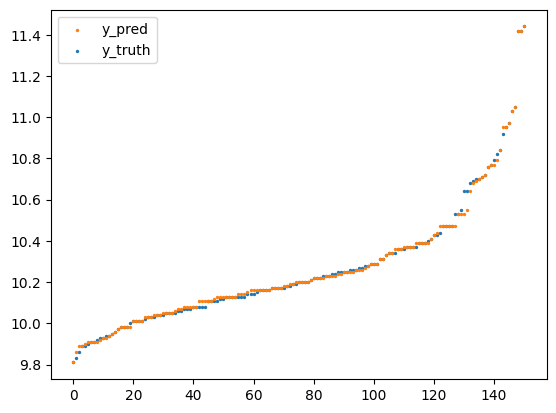

Accuracy under the threshold 0.1: 86.75496688741721
MSE: 0.006442384105960264


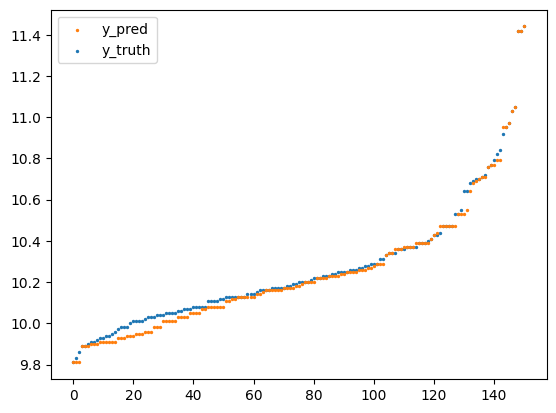

In [433]:
kd(X_train, y_train, X_test, y_test)
kd(X_filter, y_filter, X_test, y_test)


In [434]:
def ball(X_train, y_train, X_test, y_test):
    tree = BallTree(X_train)
    neighbor = list(int(ele[0]) for ele in tree.query(X_test, return_distance=False))
    prediction = y_train[neighbor]
    result(y_test, prediction)

Accuracy under the threshold 0.1: 93.37748344370861
MSE: 0.00403576158940397


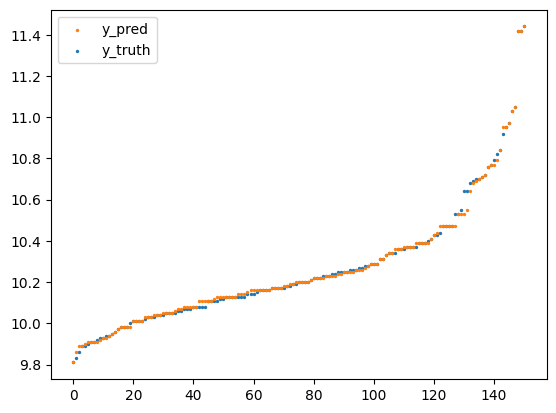

Accuracy under the threshold 0.1: 86.75496688741721
MSE: 0.006442384105960264


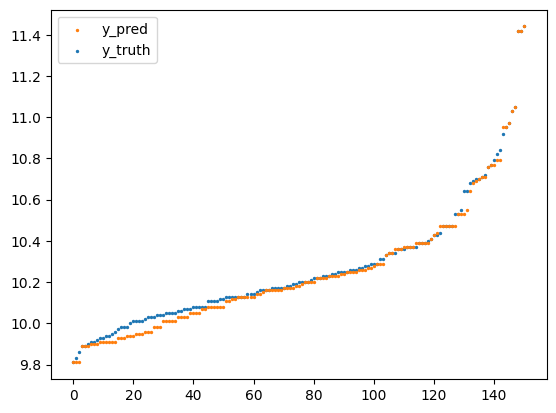

In [435]:
ball(X_train, y_train, X_test, y_test)
ball(X_filter, y_filter, X_test, y_test)